In [2]:
# %load_ext autotime
# !pip install autotime
%load_ext autoreload
%autoreload 2

In [3]:
import torch
print(f"CUDA available: {torch.cuda.is_available()}")

/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA available: False


In [6]:
from pathlib import Path
import os
import warnings
import pandas as pd
import numpy as np
import esm
import biotite.structure.io as bsio
from collections import defaultdict

from proteinttt.models.esmfold import ESMFoldTTT, DEFAULT_ESMFOLD_TTT_CFG
from proteinttt.utils.structure import calculate_tm_score, lddt_score
from proteinttt.utils.fix_pdb import fix_pdb

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 100)

base_path = Path("/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures")
ORIGINAL_PDB = base_path / Path("chothia")
PREDICTED_PDB = base_path / Path('predicted_structures')
CORRECR_PREDICTED_PDB = base_path / Path('corrected_predicted_structures')
CDR_PATH = base_path / Path("cdr_regions")
os.makedirs(CDR_PATH, exist_ok=True)

os.makedirs(CORRECR_PREDICTED_PDB, exist_ok=True)

In [10]:
SABDAB_SUMMARY_PATH = base_path / Path("sabdab_summary_all.tsv")

df = pd.read_csv(SABDAB_SUMMARY_PATH, sep="\t", low_memory=False)
df_1 = df.head(1)
print(f"Entries in summary: {len(df):,}")

Entries in summary: 19,219


In [28]:
# read all files in the directory
for file in os.listdir(PREDICTED_PDB):
    if not file.endswith("_before_ttt.pdb"):
        try:
            pdb = file.split("_")[0]
            chain = file.split("_")[1]
        except IndexError:
            print(f"Skipping file {file} due to unexpected format.")
            continue
        
        if len(chain) != 1:
            print(f"Chain {chain} in {pdb} is not a single character, skipping.")
            continue
        # if (pdb == '9lux') or (pdb == '8ytp' and chain == 'A') or (pdb == '5u64' and chain == 'B') or (pdb == '7pbz' and chain == 'F') or (pdb == '7ktx' and chain == 'I') or (pdb == '7ktx' and chain == 'J'):
        #     continue
        try:
            fix_pdb(
                ORIGINAL_PDB / f"{pdb}.pdb",
                PREDICTED_PDB / f"{pdb}_{chain}_before_ttt.pdb",
                chain,
                CORRECR_PREDICTED_PDB / f"{pdb}_{chain}_before_ttt.pdb"
                )
            fix_pdb(
                ORIGINAL_PDB / f"{pdb}.pdb",
                PREDICTED_PDB / f"{pdb}_{chain}_ttt.pdb",
                chain,
                CORRECR_PREDICTED_PDB / f"{pdb}_{chain}_ttt.pdb"
                )
        except Exception as e:
            warnings.warn(f"Error processing {pdb}_{chain}: {e}")
            continue

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 84, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 79, ' ')` to `(' ', 84, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 85, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 80, ' ')` to `(' ', 85, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 86, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 81, ' ')` to `(' ', 86, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Chain Hchain in 9lux is not a single character, skipping.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Chain summary in sabdab is not a single character, skipping.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Chain Lchain in 9fyt is not a single character, skipping.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 46, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 43, ' ')` to `(' ', 46, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 47, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 44, ' ')` to `(' ', 47, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.


/tmp/ipykernel_3218478/65606968.py:30: UserWarning: Error processing 9lux_B: Length mismatch: original 118, predicted 255, /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/predicted_structures/9lux_B_before_ttt.pdb
  warnings.warn(f"Error processing {pdb}_{chain}: {e}")


Sequence matches exactly.
Sequence matches exactly.


/tmp/ipykernel_3218478/65606968.py:30: UserWarning: Error processing 8ytp_A: Length mismatch: original 119, predicted 236, /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/predicted_structures/8ytp_A_before_ttt.pdb
  warnings.warn(f"Error processing {pdb}_{chain}: {e}")


Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/tmp/ipykernel_3218478/65606968.py:30: UserWarning: Error processing 5u64_B: Length mismatch: original 126, predicted 127, /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/predicted_structures/5u64_B_before_ttt.pdb
  warnings.warn(f"Error processing {pdb}_{chain}: {e}")
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/projec

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Skipping file 9fyt due to unexpected format.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Chain Hchain in 9luy is not a single character, skipping.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 24, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 7, ' ')` to `(' ', 24, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 25, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 25, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 26, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 26, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 24, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 7, ' ')` to `(' ', 24, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 25, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 25, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 26, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 26, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 9, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 9, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 10, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 10, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 11, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 10, ' ')` to `(' ', 11, ' ')` might create access inconsistencies to children of the p

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 27, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 27, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 28, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 28, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 29, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 29, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 32, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 31, ' ')` to `(' ', 32, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 33, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 32, ' ')` to `(' ', 33, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 34, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 33, ' ')` to `(' ', 34, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 19, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 19, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 21, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 21, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 22, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 10, ' ')` to `(' ', 22, ' ')` might create access inconsistencies to children of the

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 44, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 41, ' ')` to `(' ', 44, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 46, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 43, ' ')` to `(' ', 46, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 18, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 18, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 19, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 10, ' ')` to `(' ', 19, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 20, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 11, ' ')` to `(' ', 20, ' ')` might create access inconsistencies to children of th

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 18, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 15, ' ')` to `(' ', 18, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 19, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 16, ' ')` to `(' ', 19, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 20, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 17, ' ')` to `(' ', 20, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 35, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 34, ' ')` to `(' ', 35, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 36, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 35, ' ')` to `(' ', 36, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 37, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 36, ' ')` to `(' ', 37, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 46, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 43, ' ')` to `(' ', 46, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 47, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 44, ' ')` to `(' ', 47, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 46, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 43, ' ')` to `(' ', 46, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 47, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 44, ' ')` to `(' ', 47, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 9, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 9, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 10, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 10, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 11, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 11, ' ')` might create access inconsistencies to children of the pa

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 10, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 7, ' ')` to `(' ', 10, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 11, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 11, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 12, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 12, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.
Skipping file 9lux due to unexpected format.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 24, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 7, ' ')` to `(' ', 24, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 25, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 25, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 26, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 26, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 24, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 7, ' ')` to `(' ', 24, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 25, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 25, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 26, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 26, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 7, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 7, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 7, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 7, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/tmp/ipykernel_3218478/65606968.py:30: UserWarning: Error processing 9luy_A: Length mismatch: original 116, predicted 242, /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/predicted_structures/9luy_A_before_ttt.pdb
  warnings.warn(f"Error processing {pdb}_{chain}: {e}")
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/projec

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Chain antigen in 9fyt is not a single character, skipping.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 12, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 11, ' ')` to `(' ', 12, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 13, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 12, ' ')` to `(' ', 13, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 14, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 13, ' ')` to `(' ', 14, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 32, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 25, ' ')` to `(' ', 32, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 33, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 26, ' ')` to `(' ', 33, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 34, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 27, ' ')` to `(' ', 34, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 32, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 25, ' ')` to `(' ', 32, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 33, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 26, ' ')` to `(' ', 33, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 34, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 27, ' ')` to `(' ', 34, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 43, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 41, ' ')` to `(' ', 43, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 44, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 44, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 43, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Skipping file 6hkg due to unexpected format.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 4, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 5, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 7, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 6, ' ')` to `(' ', 7, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Chain Hchain in 9fyt is not a single character, skipping.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 7, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 7, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 29, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 29, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 30, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 30, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 31, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 31, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/tmp/ipykernel_3218478/65606968.py:30: UserWarning: Error processing 5omm_C: Length mismatch: original 92, predicted 93, /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/predicted_structures/5omm_C_before_ttt.pdb
  warnings.warn(f"Error processing {pdb}_{chain}: {e}")
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 15, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 15, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 16, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 16, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/proj

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 20, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 20, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 21, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 21, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 22, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 10, ' ')` to `(' ', 22, ' ')` might create access inconsistencies to children of the

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Skipping file 8k2w due to unexpected format.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 66, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 63, ' ')` to `(' ', 66, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 67, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 64, ' ')` to `(' ', 67, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 68, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 65, ' ')` to `(' ', 68, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 30, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 27, ' ')` to `(' ', 30, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 31, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 28, ' ')` to `(' ', 31, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 32, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 31, ' ')` to `(' ', 32, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 19, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 19, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 20, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 20, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 21, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 21, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 35, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 34, ' ')` to `(' ', 35, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 36, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 35, ' ')` to `(' ', 36, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 37, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 36, ' ')` to `(' ', 37, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 10, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 10, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 11, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 10, ' ')` to `(' ', 11, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 12, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 11, ' ')` to `(' ', 12, ' ')` might create access inconsistencies to children of th

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 76, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 75, ' ')` to `(' ', 76, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 77, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 76, ' ')` to `(' ', 77, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 78, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 77, ' ')` to `(' ', 78, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 76, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 75, ' ')` to `(' ', 76, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 77, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 76, ' ')` to `(' ', 77, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 78, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 77, ' ')` to `(' ', 78, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 76, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 73, ' ')` to `(' ', 76, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 77, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 74, ' ')` to `(' ', 77, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 78, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 75, ' ')` to `(' ', 78, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 76, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 73, ' ')` to `(' ', 76, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 77, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 74, ' ')` to `(' ', 77, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 78, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 75, ' ')` to `(' ', 78, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.


/tmp/ipykernel_3218478/65606968.py:30: UserWarning: Error processing 7a5v_O: Length mismatch: original 108, predicted 121, /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/predicted_structures/7a5v_O_before_ttt.pdb
  warnings.warn(f"Error processing {pdb}_{chain}: {e}")
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 15, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 15, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 16, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 16, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/pr

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/tmp/ipykernel_3218478/65606968.py:30: UserWarning: Error processing 9kfb_X: Length mismatch: original 114, predicted 190, /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/predicted_structures/9kfb_X_before_ttt.pdb
  warnings.warn(f"Error processing {pdb}_{chain}: {e}")
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 43, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 43, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 44, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 43, ' ')` to `(' ', 44, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 29, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 29, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 30, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 30, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 31, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 31, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 43, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 43, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 44, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 43, ' ')` to `(' ', 44, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 44, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 46, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 43, ' ')` to `(' ', 46, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 47, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 44, ' ')` to `(' ', 47, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 53, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 50, ' ')` to `(' ', 53, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 54, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 51, ' ')` to `(' ', 54, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 55, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 52, ' ')` to `(' ', 55, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 7, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 7, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 19, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 7, ' ')` to `(' ', 19, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 20, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 20, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 21, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 21, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 19, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 7, ' ')` to `(' ', 19, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 20, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 8, ' ')` to `(' ', 20, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 21, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 9, ' ')` to `(' ', 21, ' ')` might create access inconsistencies to children of the 

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 44, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 40, ' ')` to `(' ', 44, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 41, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 46, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 46, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 45, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 40, ' ')` to `(' ', 45, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 46, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 41, ' ')` to `(' ', 46, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 47, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 42, ' ')` to `(' ', 47, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 5, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 5, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 6, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 6, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 76, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 74, ' ')` to `(' ', 76, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 77, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 75, ' ')` to `(' ', 77, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 78, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 76, ' ')` to `(' ', 78, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 17, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 13, ' ')` to `(' ', 17, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 18, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 14, ' ')` to `(' ', 18, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 19, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 15, ' ')` to `(' ', 19, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 17, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 13, ' ')` to `(' ', 17, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 18, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 14, ' ')` to `(' ', 18, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 19, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 15, ' ')` to `(' ', 19, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 31, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 29, ' ')` to `(' ', 31, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 32, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 30, ' ')` to `(' ', 32, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 33, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 31, ' ')` to `(' ', 33, ' ')` might create access inconsistencies to children of t

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.
Sequence matches exactly.
Sequence matches exactly.


/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 2, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 1, ' ')` to `(' ', 2, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 3, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 2, ' ')` to `(' ', 3, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/scratch/project/open-32-14/pimenol1/miniconda3/envs/proteinttt/lib/python3.10/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 4, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 3, ' ')` to `(' ', 4, ' ')` might create access inconsistencies to children of the parent

Sequence matches exactly.


In [12]:
def extract_cdr_plddt_from_pdb(pdb_file_path,chain, is_heavy: bool = True):
    """
    Extract pLDDT scores for CDR regions from a PDB file.
    Returns:
        Dict[str, Dict[str, float]]: Nested dictionary with structure:
        {
            'pair_1': {'H1': 85.2, 'H2': 90.1, 'H3': 78.5, 'L1': 88.3, 'L2': 92.1, 'L3': 82.7, 'CDR_mean': 86.2},
            'pair_2': {...},
            'overall': {'CDR_mean': 84.5}
        }
    """
    # CDR ranges based on Chothia numbering
    if is_heavy:
        CDR_RANGES = {
            'H1': (26, 32),
            'H2': (52, 56),
            'H3': (95, 102),
        }
    else:
        CDR_RANGES = {
            'L1': (24, 34),
            'L2': (50, 56),
            'L3': (89, 97)
        }

    def is_in_cdr_region(residue_number: int):
        """Check if residue is in CDR region and return CDR name."""
        for cdr_name, (start, end) in CDR_RANGES.items():
            if start <= residue_number <= end:
                return cdr_name
        return None

    def extract_plddt_from_atoms(pdb_file_path):
        """Extract pLDDT values from B-factor column of ATOM records."""
        plddt_map = defaultdict(dict)

        with open(pdb_file_path, 'r') as f:
            for line in f:
                if line.startswith('ATOM') and line[12:16].strip() == 'CA':
                    chain_id = line[21].strip()
                    residue_num_str = line[22:26].strip()
                    b_factor = float(line[60:66].strip())

                    try:
                        if residue_num_str[-1].isalpha():
                            residue_num = int(residue_num_str[:-1])
                        else:
                            residue_num = int(residue_num_str)
                    except ValueError:
                        print(f"Skipping line due to ValueError: {line.strip()}")
                        continue

                    plddt_map[chain_id][residue_num] = b_factor

        return plddt_map

    plddt_map = extract_plddt_from_atoms(pdb_file_path)
    # print(f"pLDDT scores {plddt_map}")

    results = {}
    all_cdr_scores = []

    cdr_scores = {cdr: [] for cdr in ['H1', 'H2', 'H3', 'L1', 'L2', 'L3']}

    for residue_num, plddt_score in plddt_map[chain].items():
        cdr_region = is_in_cdr_region(residue_num)
        if cdr_region:
            cdr_scores[cdr_region].append(plddt_score)

    # Calculate mean pLDDT for each CDR
    pair_results = {}
    for cdr_name, scores in cdr_scores.items():
        if scores:
            mean_score = sum(scores) / len(scores)
            pair_results[cdr_name] = round(mean_score, 2)
            all_cdr_scores.extend(scores)
        else:
            pair_results[cdr_name] = None  # CDR not found or no pLDDT data

    # Calculate mean for this chain
    valid_scores = [score for score in pair_results.values() if score is not None]
    if valid_scores:
        pair_results['CDR_mean'] = round(sum(valid_scores) / len(valid_scores), 2)
    else:
        pair_results['CDR_mean'] = None

    results = pair_results

    return results

In [8]:
import pandas as pd
from typing import Optional


def classify_chain(df: pd.DataFrame, pdb_id: str, chain_id: str, model: Optional[int] = None) -> str:
    """
    Classify a chain in a given PDB as 'heavy', 'light', or 'antigen' using all matching rows.

    - Aggregates across multiple rows for the same pdb (and optional model).
    - Handles pipe-separated chain lists like 'B|F|E' and whitespace.
    - Returns: 'heavy' | 'light' | 'antigen' | 'unknown'
    """
    required_cols = {'pdb', 'Hchain', 'Lchain'}
    missing = required_cols - set(df.columns)
    if missing:
        raise ValueError(f"DataFrame missing required columns: {missing}")
    # antigen_chain is optional in some tables; handle gracefully
    has_antigen = 'antigen_chain' in df.columns

    pdb_id_norm = str(pdb_id).strip().lower()
    chain_id_norm = str(chain_id).strip()

    # Filter by pdb (case-insensitive) and optional model
    df_match = df[df['pdb'].astype(str).str.lower() == pdb_id_norm]
    if model is not None and 'model' in df.columns:
        df_match = df_match[df_match['model'] == model]

    if df_match.empty:
        return "unknown"

    def split_chains(val) -> set:
        if pd.isna(val):
            return set()
        return set([p for p in str(val).replace(" ", "").split("|") if p])

    # Aggregate across all matching rows
    heavy_set, light_set, antigen_set = set(), set(), set()
    for _, row in df_match.iterrows():
        heavy_set |= split_chains(row.get('Hchain'))
        light_set |= split_chains(row.get('Lchain'))
        if has_antigen:
            antigen_set |= split_chains(row.get('antigen_chain'))

    # Priority: heavy > light > antigen
    if chain_id_norm in heavy_set:
        return "H"
    if chain_id_norm in light_set:
        return "L"
    if has_antigen and chain_id_norm in antigen_set:
        return "A"
    return "UK"

In [87]:
df_cdrs = pd.DataFrame(columns=['pdb','chain', 'pLDDT_before', 'pLDDT_after'])

In [88]:
new_rows = []
num = 0 
for file in os.listdir(CORRECR_PREDICTED_PDB):
    if file.endswith("_before_ttt.pdb"):
        continue
    pdb: str = file.split("_")[0]
    chain = file.split("_")[1]
    
    chain_class = classify_chain(df, pdb, chain)
    if chain_class == "H":
        is_heavy = True
    elif chain_class == "L":
        is_heavy = False
    else:
        continue
    
    new_rows.append({
        'pdb': pdb,
        'chain': chain,
        'pLDDT_before': extract_cdr_plddt_from_pdb(CORRECR_PREDICTED_PDB / f"{pdb}_{chain}_before_ttt.pdb", chain, is_heavy=is_heavy)['CDR_mean'],
        'pLDDT_after': extract_cdr_plddt_from_pdb(CORRECR_PREDICTED_PDB / f"{pdb}_{chain}_ttt.pdb", chain, is_heavy=is_heavy)['CDR_mean']
    })

df_cdrs = pd.concat([df_cdrs, pd.DataFrame(new_rows)], ignore_index=True)

/tmp/ipykernel_2699030/861621841.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cdrs = pd.concat([df_cdrs, pd.DataFrame(new_rows)], ignore_index=True)


In [89]:
pd.DataFrame(new_rows)

pdb chain  pLDDT_before  pLDDT_after
0    1jrh     H         82.10        82.79
1    6ba5     H         73.54        74.04
2    8hc8     L         66.20        87.66
3    5dt1     H         75.03        76.74
4    7y26     D         79.53        78.16
..    ...   ...           ...          ...
245  6y1r     E         68.87        72.89
246  7u9p     H         71.66        76.85
247  4ocs     H         71.36        73.40
248  8hc8     H         68.38        69.78
249  8sbb     B         71.33        75.37

[250 rows x 4 columns]

In [90]:
df_cdrs.query("pLDDT_before.notna()").shape

(250, 4)

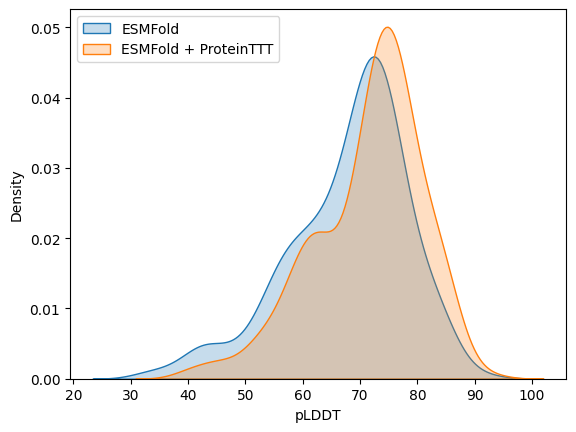

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.kdeplot(df_cdrs['pLDDT_before'], label='ESMFold', fill=True)
sns.kdeplot(df_cdrs['pLDDT_after'], label='ESMFold + ProteinTTT', fill=True)
plt.xlabel('pLDDT')
plt.legend()
plt.show()

In [13]:
def extract_cdr_to_new_pdb(input_pdb_path, output_pdb_path, chain, is_heavy: bool = True):
    if is_heavy:
        CDR_RANGES = {
            'H1': (26, 32),
            'H2': (52, 56),
            'H3': (95, 102),
        }
    else:
        CDR_RANGES = {
            'L1': (24, 34),
            'L2': (50, 56),
            'L3': (89, 97)
        }

    def is_in_cdr_region(residue_number: int):
        """Check if residue is in CDR region."""
        for start, end in CDR_RANGES.values():
            if start <= residue_number <= end:
                return True
        return False

    cdr_lines = []
    with open(input_pdb_path, 'r') as f:
        for line in f:
            if (line.startswith('ATOM')) and line[21].strip() == chain:
                # Parse residue number
                residue_num_str = line[22:26].strip()
                try:
                    if residue_num_str[-1].isalpha():
                        residue_num = int(residue_num_str[:-1])
                    else:
                        residue_num = int(residue_num_str)
                except ValueError:
                    print(f"Skipping line due to ValueError: {line.strip()}")
                    continue

                # Check if it's in CDR and is a CA atom (can be adjusted)
                if is_in_cdr_region(residue_num) and line[12:16].strip() == 'CA':
                    cdr_lines.append(line)

    # Write the collected lines to the output PDB
    with open(output_pdb_path, 'w') as f:
        for line in cdr_lines:
            f.write(line)

    print(f"New PDB file with CDR regions saved to: {output_pdb_path}")

In [20]:
CORRECR_PREDICTED_PDB

PosixPath('/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/corrected_predicted_structures')

In [30]:
for file in os.listdir(CORRECR_PREDICTED_PDB):
    pdb = file.split("_")[0]
    chain = file.split("_")[1]
    chain_class = classify_chain(df, pdb, chain)
    if chain_class == "H":
        is_heavy = True
    elif chain_class == "L":
        is_heavy = False
    else:
        continue
    extract_cdr_to_new_pdb(
        CORRECR_PREDICTED_PDB / file,
        CDR_PATH / file,
        file.split("_")[1],
        is_heavy=is_heavy
    )

New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/1jrh_H_ttt.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/6ba5_H_ttt.pdb


New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/8hc8_L_ttt.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/5dt1_H_ttt.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/9d7i_J_before_ttt.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/7y26_D_ttt.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/9dzq_C_before_ttt.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/8y6h_C_before_ttt.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data

In [19]:
for file in os.listdir(CORRECR_PREDICTED_PDB):
    if file.endswith("_before_ttt.pdb"):
        continue
    pdb = file.split("_")[0]
    chain = file.split("_")[1]
    
    chain_class = classify_chain(df, pdb, chain)
    if chain_class == "H":
        is_heavy = True
    elif chain_class == "L":
        is_heavy = False
    else:
        continue
    
    extract_cdr_to_new_pdb(
        ORIGINAL_PDB / f"{pdb}.pdb",
        CDR_PATH / f"{pdb}_{chain}.pdb",
        chain,
        is_heavy=is_heavy)
    

New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/1jrh_H.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/6ba5_H.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/8hc8_L.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/5dt1_H.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/7y26_D.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/8fsl_D.pdb
New PDB file with CDR regions saved to: /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/8w5g_H.pdb
New PD

In [14]:
new_rows = []
num = 0
for file in os.listdir(CDR_PATH):
    if file.endswith("_before_ttt.pdb"):
        continue
    pdb: str = file.split("_")[0]
    chain = file.split("_")[1]

    chain_class = classify_chain(df, pdb, chain)
    if chain_class == "H":
        is_heavy = True
    elif chain_class == "L":
        is_heavy = False
    else:
        continue
    
    new_rows.append({
        'pdb': pdb,
        'chain': chain,
        'pLDDT_before': extract_cdr_plddt_from_pdb(CDR_PATH / f"{pdb}_{chain}_before_ttt.pdb", chain, is_heavy=is_heavy)['CDR_mean'],
        'pLDDT_after': extract_cdr_plddt_from_pdb(CDR_PATH / f"{pdb}_{chain}_ttt.pdb", chain, is_heavy=is_heavy)['CDR_mean'],
        'tm_score_before': calculate_tm_score(pred_path=CDR_PATH / f"{pdb}_{chain}_before_ttt.pdb", pdb_path=CDR_PATH / f"{pdb}_{chain}.pdb"),
        'tm_score_after': calculate_tm_score(pred_path=CDR_PATH / f"{pdb}_{chain}_ttt.pdb", pdb_path=CDR_PATH / f"{pdb}_{chain}.pdb"),

        'lddt_before' : lddt_score(pdb_ref=CDR_PATH / f"{pdb}_{chain}.pdb", pdb_model=CDR_PATH / f"{pdb}_{chain}_before_ttt.pdb"),
        'lddt_after' : lddt_score(pdb_ref=CDR_PATH / f"{pdb}_{chain}.pdb", pdb_model=CDR_PATH / f"{pdb}_{chain}_ttt.pdb")
    })

df_cdrs = pd.DataFrame(new_rows)

Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/1jrh_H.pdb:
  Chain 'H': 26 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/1jrh_H.pdb:
  Chain 'H': 26 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/6ba5_H.pdb:
  Chain 'H': 23 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/6ba5_H.pdb:
  Chain 'H': 23 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/8hc8_L.pdb:
  Chain 'L': 32 residues (e.g., ['24', '25', '26', '27', '28'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinT

Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/3c6s_D.pdb:
  Chain 'D': 19 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/8ddk_A.pdb:
  Chain 'A': 26 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/8ddk_A.pdb:
  Chain 'A': 26 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/5j57_B.pdb:
  Chain 'B': 30 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/5j57_B.pdb:
  Chain 'B': 30 residues (e.g., ['26', '27', '28', '29', '30'])
Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinT

ValueError: TM-score not found in the output

In [34]:
def inspect_pdb_chains(pdb_path):
    chains = {}
    total_atoms = 0
    with open(pdb_path, 'r') as f:
        for line in f:
            if line.startswith(('ATOM', 'HETATM')):
                chain_id = line[21:22].strip()  # Column 22
                res_num = line[22:27].strip()  # Columns 23-27 (incl. insertion code)
                if chain_id:
                    if chain_id not in chains:
                        chains[chain_id] = []
                    chains[chain_id].append(res_num)
                    total_atoms += 1
    if not chains:
        print(f"No chains found in {pdb_path}. Total ATOM/HETATM lines: {total_atoms}")
    else:
        print(f"Found {len(chains)} chain(s) in {pdb_path}:")
        for ch, res_list in chains.items():
            print(f"  Chain '{ch}': {len(res_list)} residues (e.g., {res_list[:5]})")
    return chains


# Usage
inspect_pdb_chains(CDR_PATH / "1jrh_H.pdb")

Found 1 chain(s) in /scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/all_structures/cdr_regions/1jrh_H.pdb:
  Chain 'H': 26 residues (e.g., ['26', '27', '28', '29', '30'])


{'H': ['26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '31A',
  '31B',
  '32',
  '52',
  '53',
  '54',
  '55',
  '56',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '100A',
  '100B',
  '100C',
  '100D',
  '101',
  '102']}

In [16]:
df_cdrs = pd.DataFrame(new_rows)

In [17]:
df_cdrs

pdb chain  pLDDT_before  pLDDT_after  tm_score_before  tm_score_after  \
0    1jrh     H         82.10        82.79          0.64712         0.67361   
1    6ba5     H         73.54        74.04          0.30384         0.30036   
2    8hc8     L         66.20        87.66          0.56325         0.65378   
3    5dt1     H         75.03        76.74          0.40009         0.40878   
4    7y26     D         79.53        78.16          0.43616         0.42154   
..    ...   ...           ...          ...              ...             ...   
138  6ban     D         73.54        73.54          0.29056         0.29056   
139  8jys     C         54.56        59.99          0.13073         0.13042   
140  8vs8     U         83.14        83.28          0.62834         0.68605   
141  2x1p     C         71.93        74.28          0.37072         0.52376   
142  7oaq     F         66.79        68.98          0.61210         0.45903   

     lddt_before  lddt_after  
0       0.815318    0.845375  
1       0.645983    0.647968  
2       0.779391    0.823877  
3       0.551922    0.472199  
4       0.783409    0.779541  
..           ...         ...  
138     0.644585    0.644585  
139     0.378112    0.362319  
140     0.847258    0.889463  
141     0.524858    0.610681  
142     0.768788    0.697895  

[143 rows x 8 columns]